In [1]:
import copy

In [2]:
# Function to create matrix with all zero
# Parameter: numbers of row and column

def create_zero_matrix(n_row, n_col):
    return [[0 for _ in range(n_col)] for _ in range(n_row)]

In [3]:
# Function to create an identity matrix
# Paramater: size n of the matrix

def create_identity_matrix(n):
    return [[1 if i == j else 0 for j in range(n)] for i in range(n)]

In [4]:
# Function to multiply a vector with a scalar
# Parameter: scalar and the vector

def multiply_vector_with_scalar(scalar, A_list):
    res = []
    for col in range(len(A_list)):
        res.append(A_list[col] * scalar)
    return res

In [5]:
# Function to multiply a matrix with a scalar
# Parameter: scalar and the vector

def multiply_matrix_with_scalar(scalar, A_list):
    res = []
    for row in range(len(A_list)):
        temp = []
        for col in range(len(A_list[0])):
            temp.append(A_list[row][col] * scalar)
        res.append(temp)
    return res

In [6]:
# Function to sum 2 vectors
# Parameter: vector A and B

def sumVectors(A, B):
    if len(A) != len(B):
        print("CANNOT SUM TWO VECTORS")
        return
    res = []
    for i in range(len(A)):
        res.append(A[i] + B[i])
    return res

In [7]:
# Function to sum 2 matrices
# Parameter: matrix A and B

def sumMatrices(A, B):
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        print("CANNOT SUM TWO MATRICES")
        return
    res = []
    for i in range(len(A)):
        temp = []
        for j in range(len(A[0])):
            temp.append(A[i][j] + B[i][j])
        res.append(temp)
    return res

In [8]:
# Function to subtract 2 vectors
# Parameter: vector A and B

def subtractVectors(A, B):
    if len(A) != len(B):
        print("CANNOT SUBTRACT TWO VECTORS")
        return
    res = []
    for i in range(len(A)):
        res.append(A[i] - B[i])
    return res

In [9]:
# Function to subtract 2 matrices
# Parameter: matrix A and B

def subtractMatrices(A, B):
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        print("CANNOT SUBTRACT TWO MATRICES")
        return
    res = []
    for i in range(len(A)):
        temp = []
        for j in range(len(A[0])):
            temp.append(A[i][j] - B[i][j])
        res.append(temp)
    return res

In [10]:
# Function to multiply two matrices
# Parameter: matrix A and B

def multiplyMatrices(A, B):
    if len(A[0]) != len(B):
        print("CANNOT MULTIPLY TWO MATRICES")
        return
    res = []
    for i in range(len(A)):
        temp = []
        for j in range(len(B[0])):
            sum = 0
            for k in range(len(B)):
                sum += A[i][k] * B[k][j]
            temp.append(sum)
        res.append(temp)
    return res
#print(multiplyMatrices([[1,2],[2,3]], [[2,3],[4,5]]))

In [11]:
# Function to transpose matrix
# Parameter: matrix A

def transpose(A):
    rows = len(A)
    cols = len(A[0])
    A_res = create_zero_matrix(cols, rows)
    for i in range(rows):
        for j in range(cols):
            A_res[j][i] = A[i][j]
    return A_res

In [12]:
# Function to calculate determinant of matrix A
# Parameter: matrix X

def det(A):
    # Function to create submatrix by eliminating one row and one column
    # Parameter: a row and a column need deleting
    def create_submatrix(A, i_row, i_col):
        sub_A = copy.deepcopy(A)
        sub_A = sub_A[:i_row] + sub_A[i_row + 1:]
        n_row_sub = len(sub_A)
        for i in range(n_row_sub):
            sub_A[i] = sub_A[i][:i_col] + sub_A[i][i_col+1:]
        return sub_A

    rows = len(A)
    cols = len(A[0])
    if rows == 1 and cols == 1:
        return A[0][0]
    sum = 0
    
    for i in range(cols):
        sub_A = create_submatrix(A, 0, i)
        sign = (-1) ** (i % 2)
        sub_det = det(sub_A)
        sum += sign * A[0][i] * sub_det
    
    return sum

In [13]:
# Function to simplify the row (divided by its left-most value)
# Parameter: row and start row (pos)

def simplify(row, pos):
    
    left_most_value = row[pos]
    
    for i in range(len(row)):
        row[i] = row[i] / left_most_value
        
    return row

# Function to swap two rows of a matrix
# Parameter: two rows need swapping

def swapTwoRows(firstRow, secondRow):
    temp = firstRow
    firstRow = secondRow
    secondRow = temp
    
    return firstRow, secondRow

# Function to rearrange the matrix
# Row has 0 at the left-most position will be swapped:
# Parameter: matrix A, start row (pos)

def rearrangeMatrix(A, pos):
    rows = len(A)
    cols = len(A[0])
    
    for i in range(pos, rows):
        
        for j in range(i+1, rows):
            
            # if left-most value already != 0: stop the loop, move to next row
            if A[i][pos] != 0:
                break
                
            # if left-most value = 0: swap two rows until the value != 0
            elif A[i][pos] == 0 and A[j][pos] != 0:
                A[i], A[j] = swapTwoRows(A[i], A[j])

# Function to perform Gauss-Jordan elimination
# Parameter: matrix A

def GaussJordanElimination(A):
    rows = len(A)
    cols = len(A[0])
    
    # Gauss Elimination
    for t in range(rows):
        if t == rows - 1:
            if A[t][t] != 0 and A[t][t] != 1:
                A[t] = simplify(A[t], t)
            break
        while A[t][t] == 0:
            rearrangeMatrix(A, rows, cols, t)
        A[t] = simplify(A[t], t)
        for i in range(t + 1, rows):
            ratio = -(A[i][t] * A[t][t])
            for j in range(cols):
                A[i][j] = A[i][j] + ratio * A[t][j]

    for i_col in range(rows - 1, 0, -1):
        for i_row in range(i_col - 1, -1, -1):
            ratio = -A[i_row][i_col]
            for j in range(i_col, cols):
                A[i_row][j] += ratio * A[i_col][j]
                        
    return A

# Function to inverse matrix
# Parameter: matrix A

def inverse(A):
    
    rows = len(A)
    cols = len(A[0])
    
    if rows != cols:
        return A
    
    # If determinant of the matrix is 0
    if det(A) == 0:
        print("Matrix is irreversible")
        return A
    
    # If matrix A has only 1 element
    if rows == 1 and cols == 1:
        value = 1/det(A)
        A_res = []
        A_res.append(value)
        return A_res
    
    # Combine matrix A and identity matrix
    identity_A = create_identity_matrix(rows)
    A_result = []
    for i in range(rows):
        array = A[i]
        for j in range(len(identity_A)):
            array.append(identity_A[i][j])
        A_result.append(array)
    
    # Do Gauss-Jordan Elimination
    A_result = GaussJordanElimination(A_result)
    
    # Get inversed matrix
    for i in range(rows):
        for j in range(rows):
            del A_result[i][0]
    
    return A_result

In [14]:
# Function to perform Gauss elimination
# Parameter: matrix A

def gaussElimination(A):
    rows = len(A)
    cols = len(A[0])
    min = 0
    if rows >= cols:
        min = cols
    else:
        min = rows
    
    for i in range(min):
        pivot = A[i][i]
        pivotRow = i
        
        # Simplify current row
        if pivot != 0:
            A[i] = simplify(A[i], i)
            pivot = A[i][i]
        else:
            for j in range(i+1, rows):
                if A[j][i] != 0:
                    pivotRow = j
                    A[i], A[pivotRow] = swapTwoRows(A[i], A[pivotRow])
                    A[i] = simplify(A[i], i)
                    pivot = A[i][i]
                    break
            
        # Simplify other rows
        for j in range(i + 1, rows):
            if A[j][i] != 0:
                ratio = -A[j][i] / pivot
                for k in range(cols):
                    A[j][k] = round(A[i][k] * ratio + A[j][k], 2)
                
    return A

In [15]:
# Function to do QR decomposition
# Parameter: matrix A

def QR_decomposition(A):
    # Function to calculate sum of squares
    # Parameter: vector A and B
    def sum_of_squares(A, B):
        sum = 0
        for i in range(len(A)):
            sum += A[i] * B[i]
        return sum
           
    # Function to do Gram-Schmidt algorithm
    # Parameter: matrix A
    def Gram_Schmidt_algorithm(A):
        A = transpose(A)
        u_vectors = A
        v_vectors = []
        for i in range(len(A)):
            if i == 0:
                v_vectors.append(u_vectors[i])
            else:
                temp_vector = []
                temp_vector.append(u_vectors[i])
                for j in range(len(v_vectors)):
                    numerator = sum_of_squares(u_vectors[i],v_vectors[j])
                    denominator = sum_of_squares(v_vectors[j],v_vectors[j])
                    fraction = numerator / denominator
                    temp_vector.append(multiply_vector_with_scalar(fraction, v_vectors[j]))
                res_vector = temp_vector[0]
                for k in range(len(temp_vector) - 1):
                    res_vector = subtractVectors(res_vector, temp_vector[k+1])
                v_vectors.append(res_vector)
        
        w_vectors = []
        for i in range(len(A)):
            numerator = 1 / (sum_of_squares(v_vectors[i],v_vectors[i]) ** (1/2)) # A**(1/2) = sqrt(A)
            w_vectors.append(multiply_vector_with_scalar(numerator, v_vectors[i]))
        return transpose(w_vectors)
    Q = (Gram_Schmidt_algorithm(A))
    R = multiplyMatrices(transpose(Q), A)
    return Q, R
                
#Q,R = QR_decomposition([[14,-25,40],[21,57,-52],[-42,12,20]])
#print('A = {} * {}'.format(Q,R))

In [16]:
# Function to calculate exponential of a matrix
# Parameter: matrix A
def exp(A, exponent):
    if exponent == 0:
        return createOneMatrix()
    result = A
    for i in range(exponent):
        if i == 0:
            result = A
            continue
        result = multiplyMatrices(result, A)
        
    return result

||r|| = 0.32188026763516275


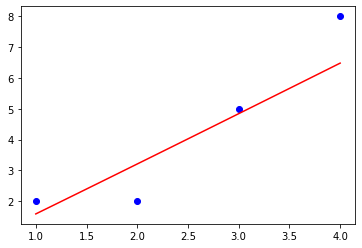

In [17]:
# Data fitting
import numpy as np
import matplotlib.pyplot as plt

def generateF_list(X):
    f0 = np.ones(len(X))
    f1 = np.log(X)
    # x: f1 = X
    # ln(x): f1 = np.log(X)
    # x^2: f2 = [X.item(i) * X.item(i) for i in range(len(f1))]
    return f0, f1

def generateA_B(X, Y):
    f0, f1 = generateF_list(X)
    A = np.matrix([[f0 [0], f0 [1], f0 [2], f0 [3]],
                   [f1 [0], f1 [1], f1 [2], f1 [3]]])
    ''' y = theta_0 + theta_1 * x + theta_2 * x^2: A = np.matrix([[f0 [0], f0 [1], f0 [2], f0 [3]],
                                                                   [f1 [0], f1 [1], f1 [2], f1 [3]],
                                                                   [f2 [0], f2 [1], f2 [2], f2 [3]]])'''
    A = A.T
    B = np.log(np.matrix([Y]).reshape(len(Y), 1))
    return A, B

def calculateThetaMatrix(A, B):
    theta_matrix = np.linalg.inv(A.T @ A) @ A.T@ B
    return theta_matrix

def calculate_r(A, theta_matrix, B):
    # chuẩn vector phần dư: ||r|| = ||A * theta - B||
    r = A @ theta_matrix - B
    result = 0
    for i in range(len(r)):
        result += r.item(i)**2
    return result

def generateModel(X, theta_matrix):
    t = np.linspace(min(X), max(X), 50)
    model = [np.exp(theta_matrix.item(0) + theta_matrix.item(1) * np.log(i)) for i in t] # y = theta_1 + theta_2 * ln(X)
    #y = theta_0 + theta_1 * x + theta_2 * x^2: model = [np.exp(theta_matrix.item(0) + theta_matrix.item(1) * i + theta_matrix.item(2) * i**2) for i in t]
    return t, model

def dataFitting(X, Y):
    A, B = generateA_B(X, Y)
    theta_matrix = calculateThetaMatrix(A, B)
    r = calculate_r(A, theta_matrix, B)
    t, model = generateModel(X, theta_matrix)

    print("||r|| = " + str(r))
    plt.scatter(X, Y, color='blue') # draw dots
    plt.plot(t, model, color='red', linestyle='solid') # draw line
    plt.show()
    
X = np.array([1,2,3,4])
Y = np.array([2,2,5,8])
dataFitting(X, Y)

In [18]:
# Function to check markov chain
# Parameter: matrix P

def checkMarkovChain(P):
    sumRow = []
    sumCol = []
    byRow = True
    byCol = True
    
    for i in range(len(P[0])):
        sum = 0
        for j in range(len(P)):
            sum += P[i][j]
        sumRow.append(round(sum, 2))
        
    for i in range(len(P)):
        sum = 0
        for j in range(len(P[0])):
            sum += P[j][i]
        sumCol.append(round(sum, 2))
        
    for index in sumRow:
        if index != 1.0:
            byRow = False
            break
            
    for index in sumCol:
        if index != 1.0:
            byCol = False
            break

    return byRow, byCol

In [19]:
# Function to calculate Markov chain
# Parameter: matrix P, pi_zero, n

def markov_chain(P, pi_zero, n):    
    byRow, byCol = checkMarkovChain(P)
    if byRow == False and byCol == False:
        print("INVALID TRANSITION MATRIX")
        return
    elif byCol:
        pi_zero = transpose(pi_zero)
        result = multiplyMatrices(exp(P, n), pi_zero)
    elif byRow:
        result = multiplyMatrices(pi_zero, exp(P, n))
    return result
        
P = [[0.81, 0.26],[0.19, 0.74]]
pi_zero = [[0,1]]
n = 20
pi_n = markov_chain(P, pi_zero, 2000)

In [20]:
# Function to perform back substitution for markov chain
# Parameter: matrix A

def backSubstitutionForMarkovChain(A):
    A_temp = []
    for i in range(len(A)):
        count_zero = 0
        for j in range(len(A[0])):
            if A[i][j] == 0:
                count_zero += 1
        if count_zero == len(A[i]) or ((count_zero == len(A[i]) - 1) and A[i][len(A[i])-1] != 0):
            continue
        else:
            A_temp.append(A[i])
    result = [0] * (len(A[0])-1)
   
    A = A_temp
    rows = len(A)
    cols = len(A[0])

    if rows == cols - 1:
        for i in range(rows - 1, -1, -1):
            if i == rows - 1:
                result[i] = A[i][cols-1] / A[i][cols-2]
            else:
                sum = A[i][cols-1]
                for j in range(cols-2, 0, -1):
                    sum -= result[j] * A[i][j]
                result[i] = round(sum, 2)            
    return result

In [24]:
# Function to find stable state of Markov chain
# Parameter: Matrix P

def stableState(P):
    byRow, byCol = checkMarkovChain(P)
    if byRow == False and byCol == False:
        print("INVALID TRANSITION MATRIX")
        return
    
    identity_matrix = create_identity_matrix(len(P))
    one_vector = [[1] * (len(P)+1)]
    if byCol:
        res_matrix = subtractMatrices(identity_matrix, P)
    elif byRow:
        res_matrix = subtractMatrices(P, identity_matrix)
    res_matrix = transpose(res_matrix)
    
    for i in range(len(res_matrix[0])):
        res_matrix[i].append(0)
    res_matrix = one_vector + res_matrix

    res_matrix = gaussElimination(res_matrix)
    res_matrix = backSubstitutionForMarkovChain(res_matrix)
    
    return res_matrix
    
P = [[0.4,0.6],[0.2,0.8]]
res = stableState(P)
print(res)

[0.25, 0.7499999999999999]
